In [224]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

In [2]:
df = pd.read_csv('D:\MADE_2022\mlops\proj1\data\heart_cleveland_upload.csv')

In [3]:
df.shape

(297, 14)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        297 non-null    int64  
 1   sex        297 non-null    int64  
 2   cp         297 non-null    int64  
 3   trestbps   297 non-null    int64  
 4   chol       297 non-null    int64  
 5   fbs        297 non-null    int64  
 6   restecg    297 non-null    int64  
 7   thalach    297 non-null    int64  
 8   exang      297 non-null    int64  
 9   oldpeak    297 non-null    float64
 10  slope      297 non-null    int64  
 11  ca         297 non-null    int64  
 12  thal       297 non-null    int64  
 13  condition  297 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 32.6 KB


In [5]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0


In [6]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,2.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,0.602694,0.676768,0.835017,0.461279
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,0.956690,0.499340
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,2.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,56.000000,1.000000,2.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,0.000000,0.000000
75%,61.000000,1.000000,3.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,1.000000,1.000000,2.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,2.000000,1.000000


1)Отсутствуют незаполненные значения <br>
2)В датасете имеются различные виды признаков: вещественные, бинарные, категориальные <br>
3)Возраст людей в наблюдениях находится в рамках от 29 до 77 лет <br>
4)Среднее значение таргета (condition) показывает, что в датасете приблизительно одинаковое количество меток<br>

In [7]:
columns1 = [
    'age',
    'sex',
    'cp',
    'trestbps',
    'chol',
    'fbs',
    'restecg',
    'condition',
]
columns2 = [
    'thalach',
    'exang',
    'oldpeak',
    'slope',
    'ca',
    'thal',
    'condition',
]

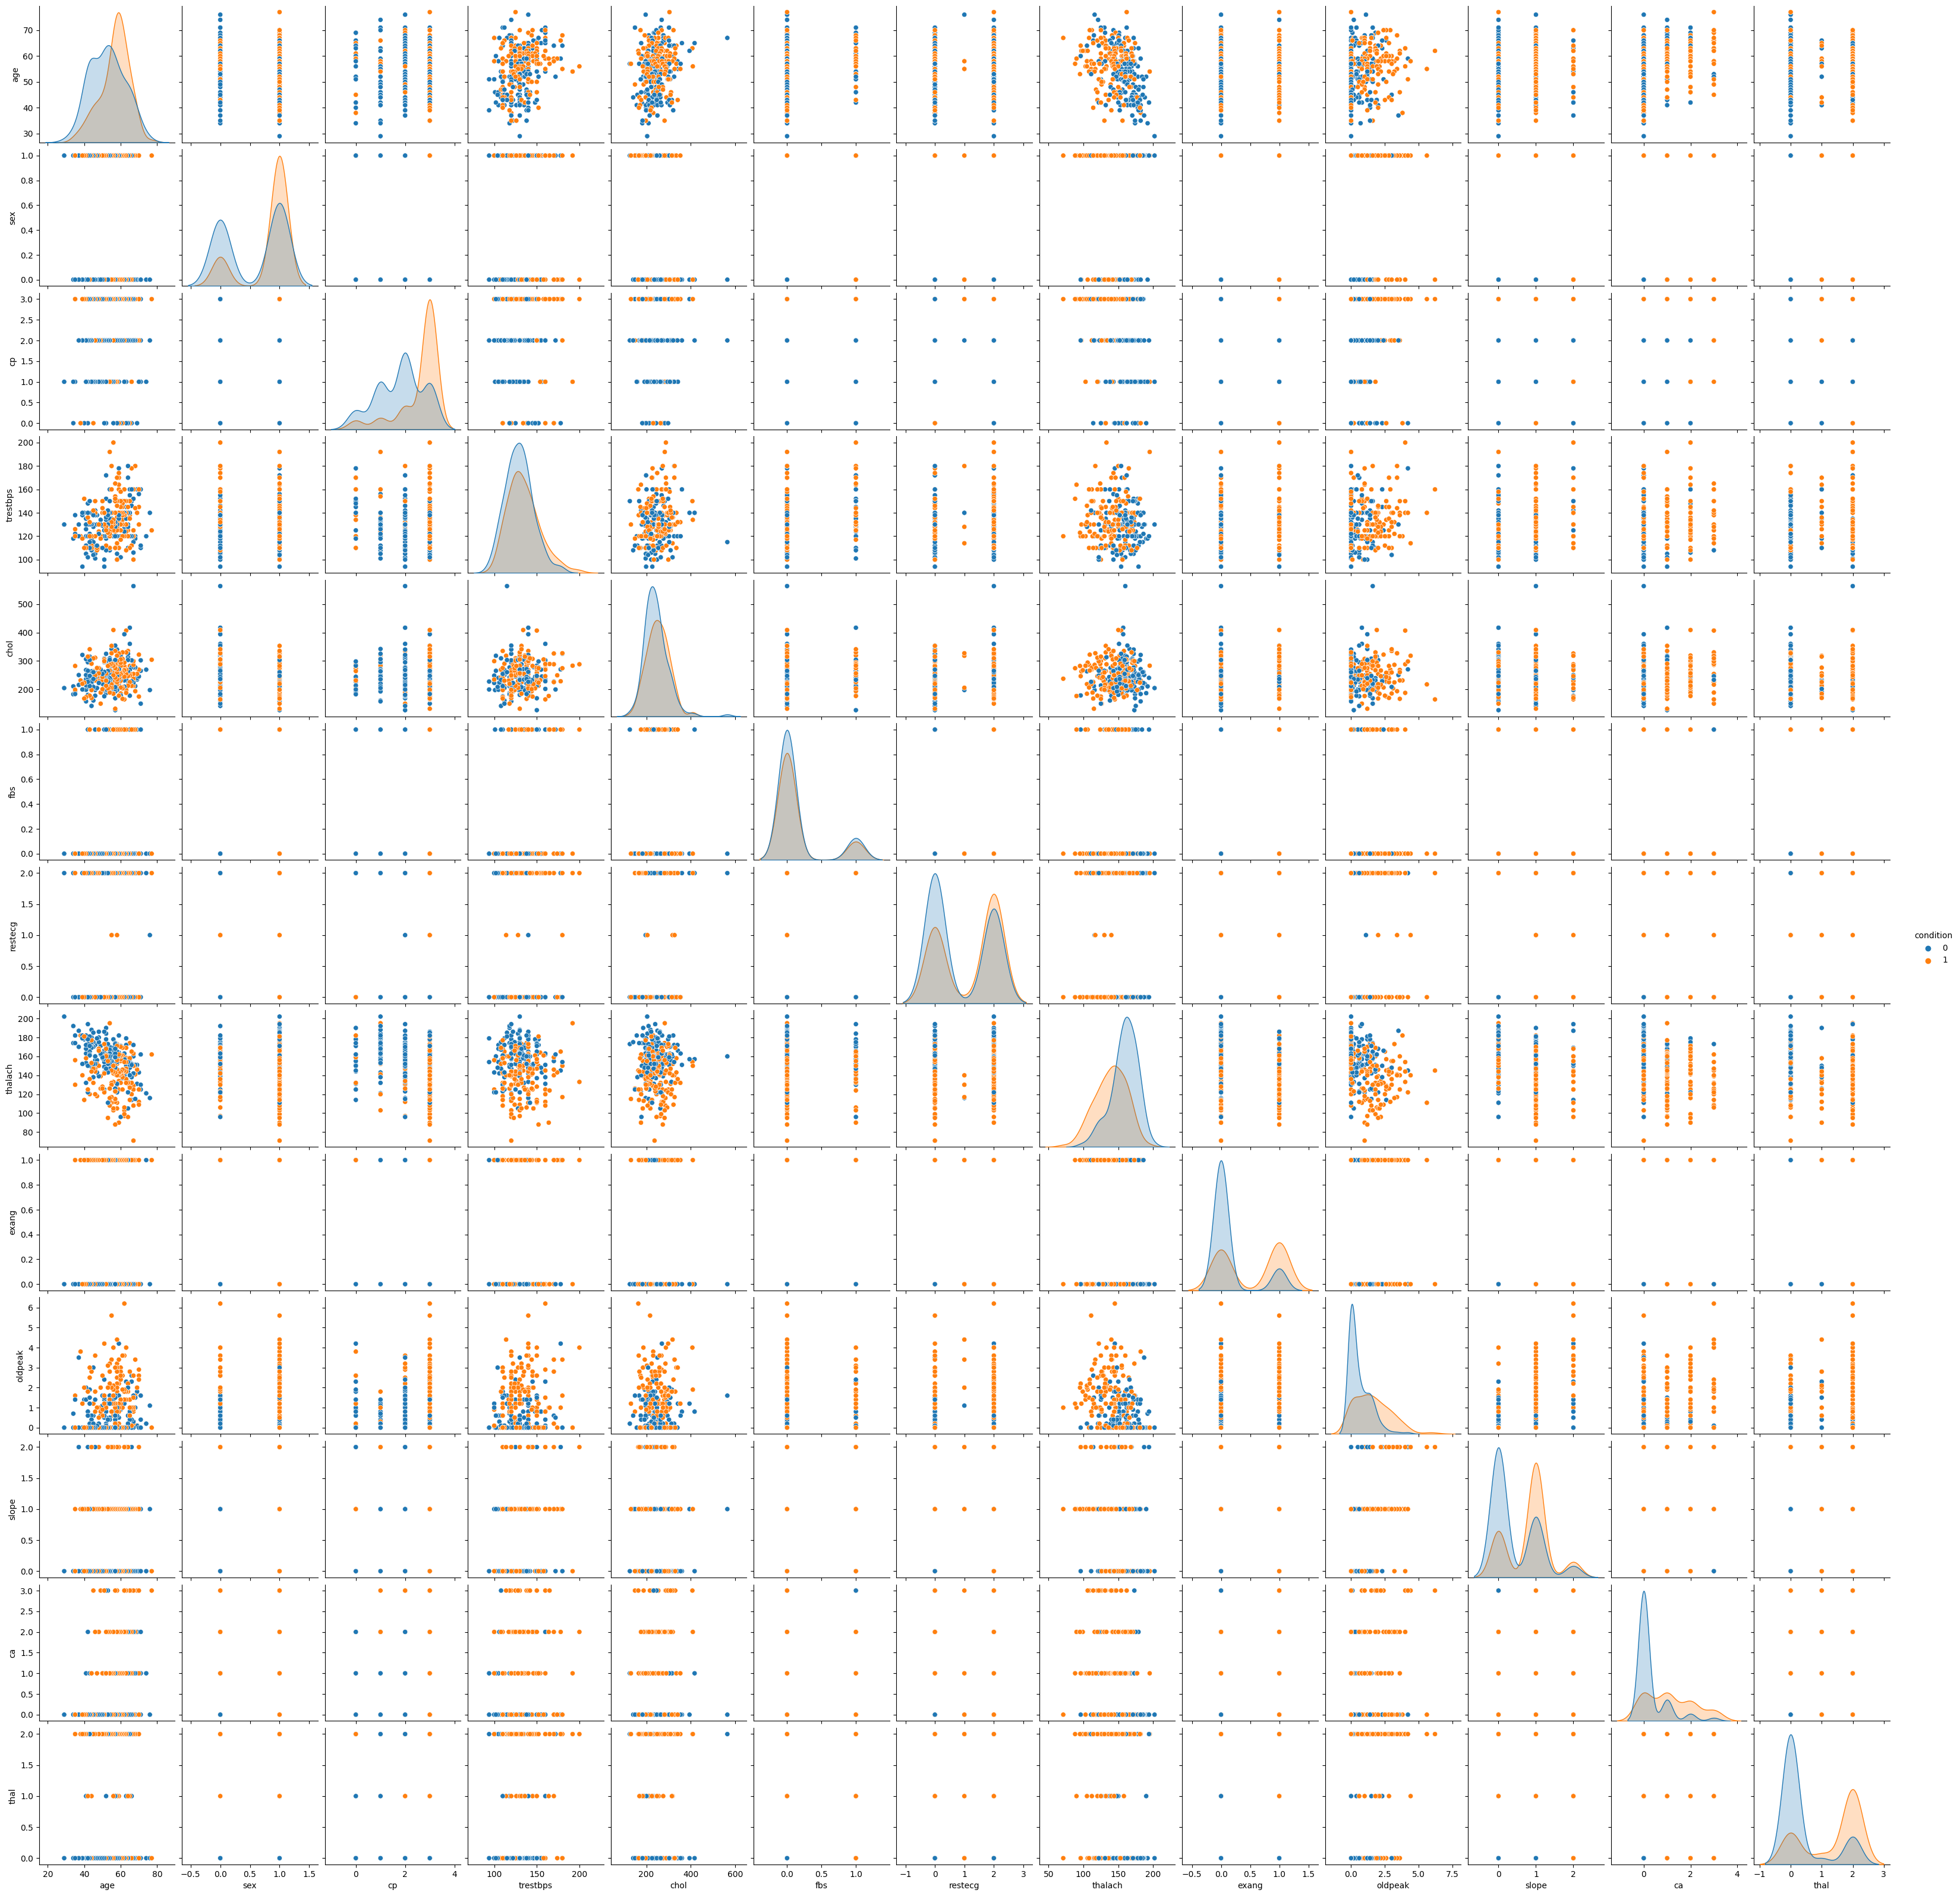

In [34]:
sns.pairplot(df, hue='condition')

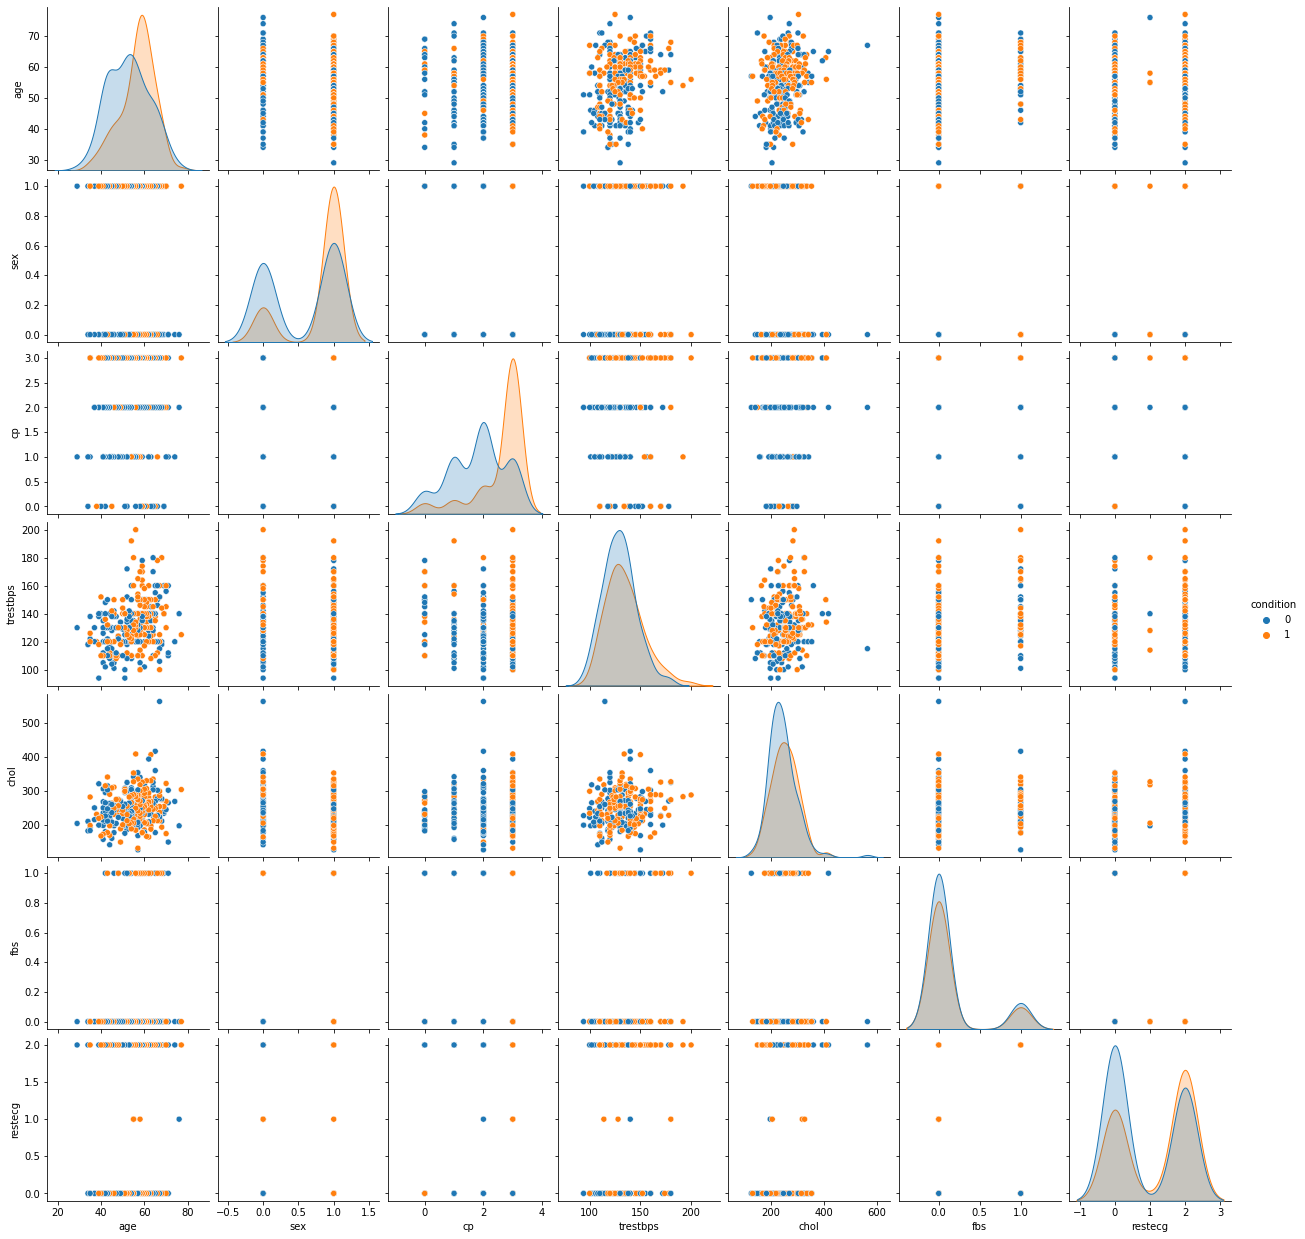

In [8]:
sns.pairplot(df.loc[:, columns1], hue='condition')

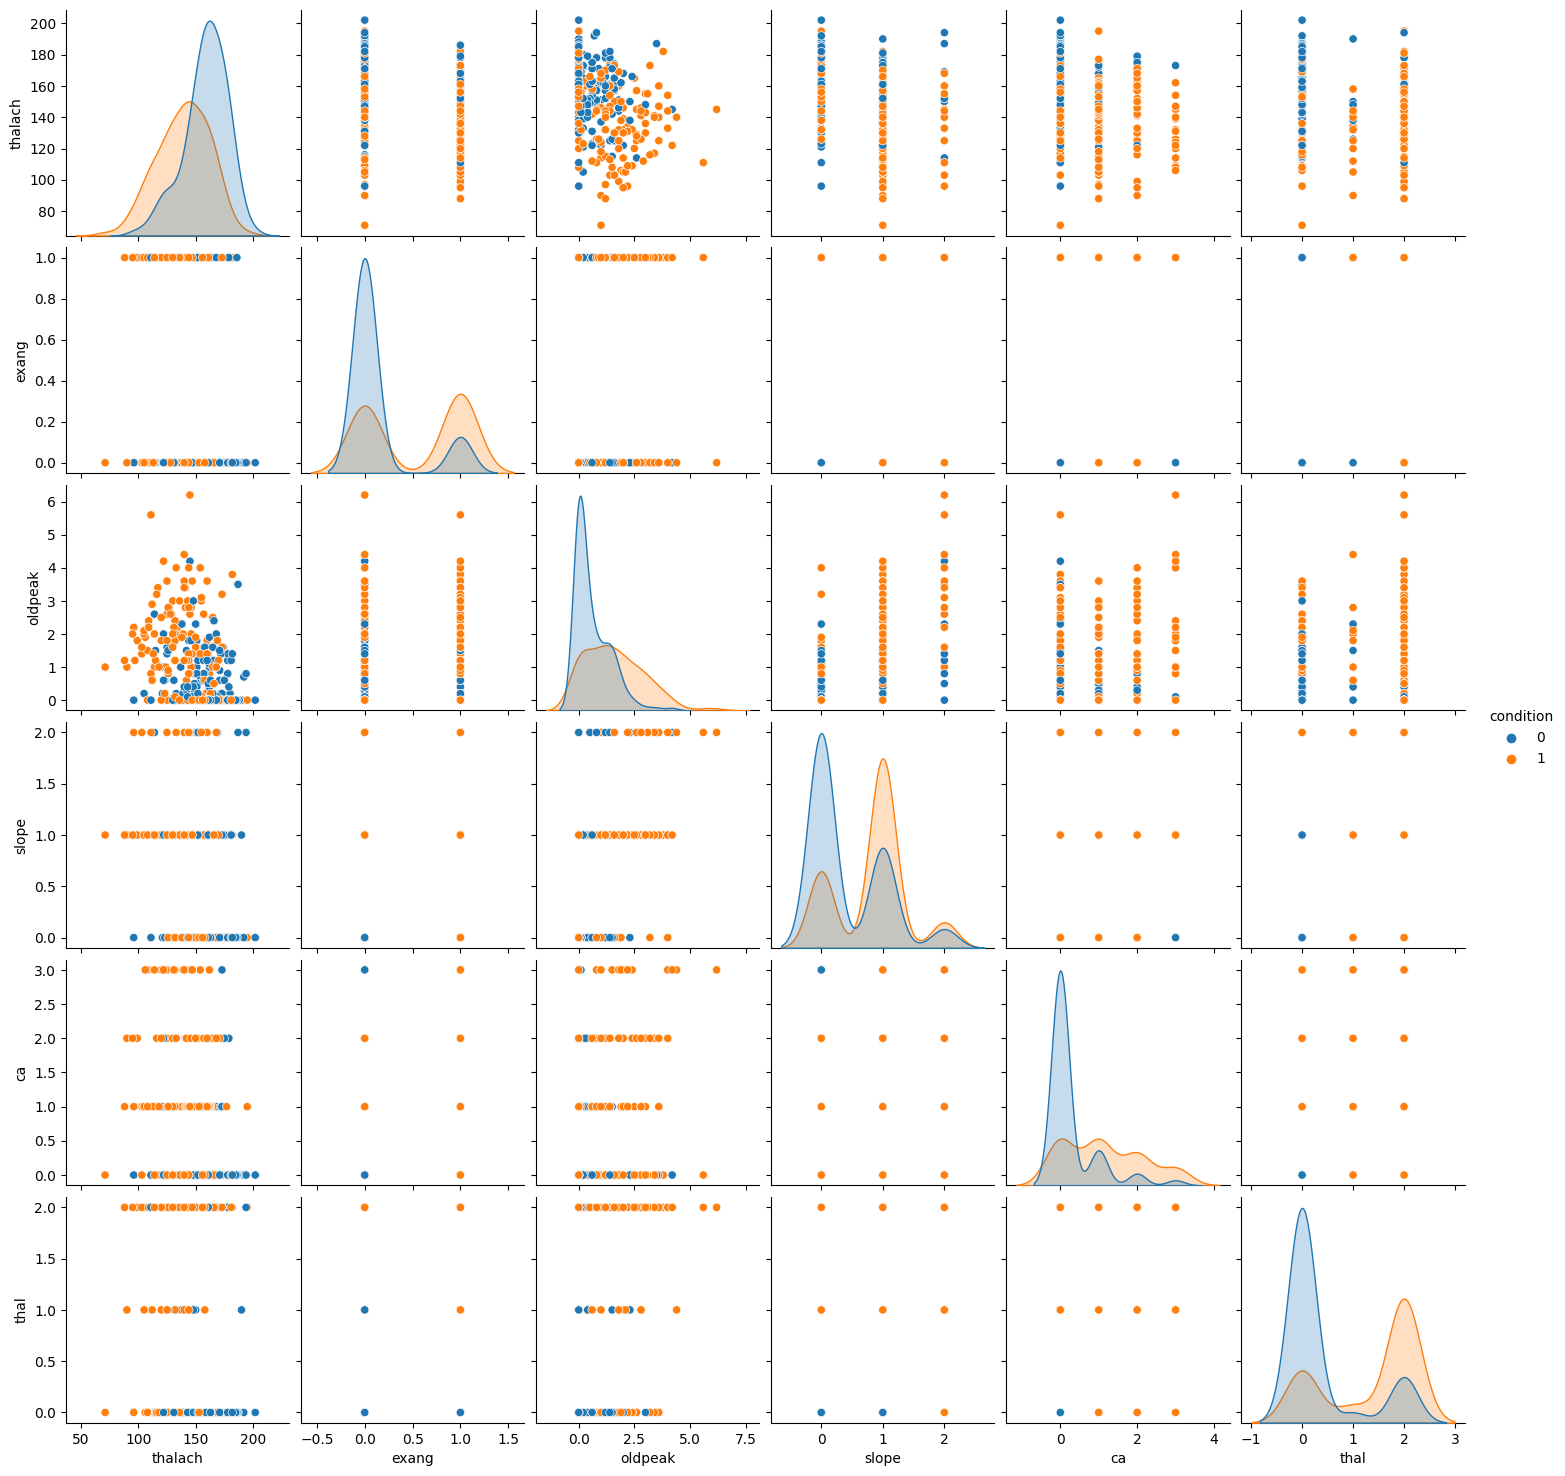

In [9]:
sns.pairplot(df.loc[:, columns2], hue='condition')

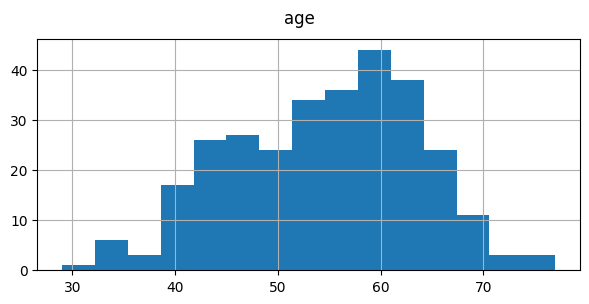

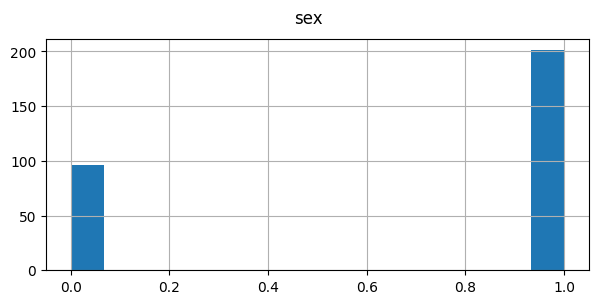

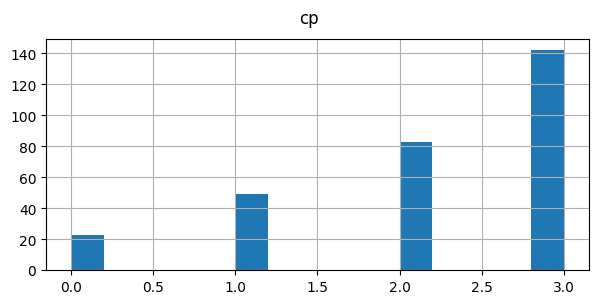

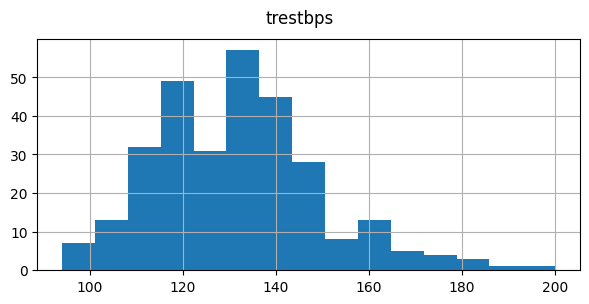

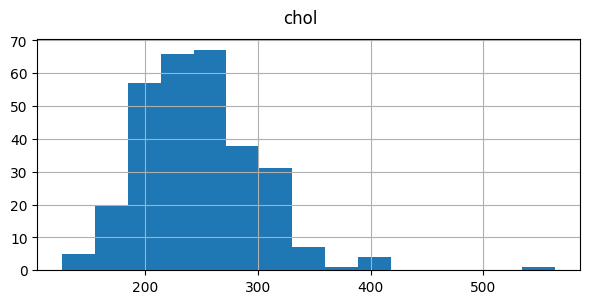

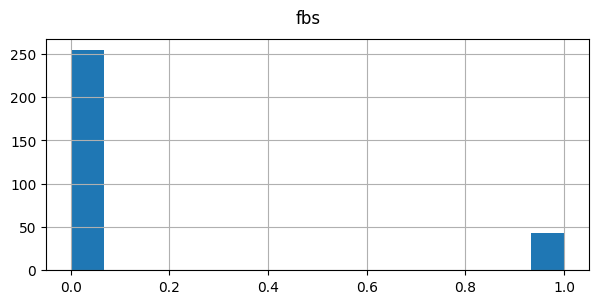

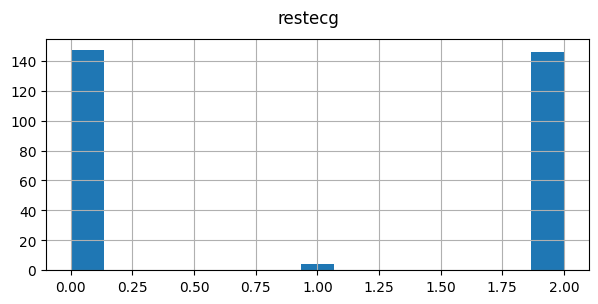

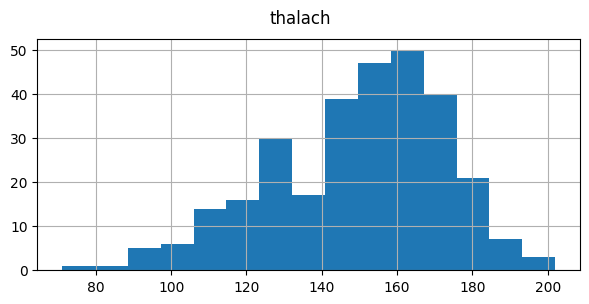

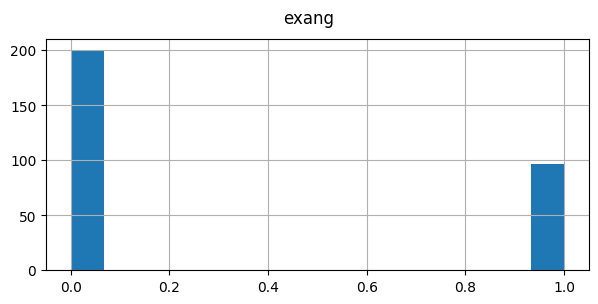

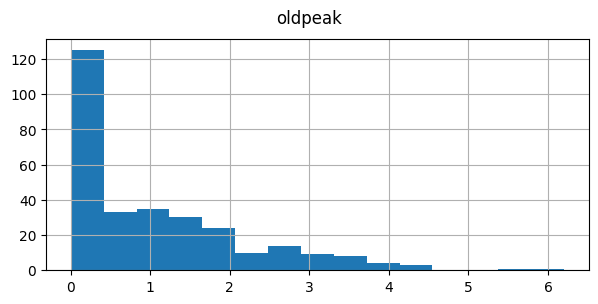

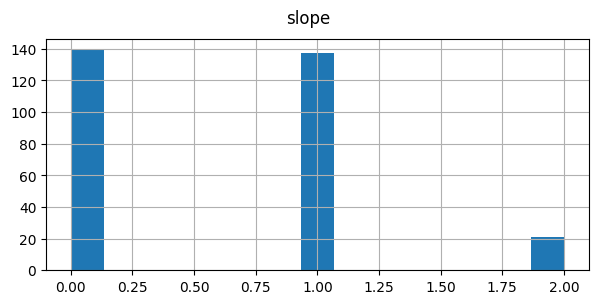

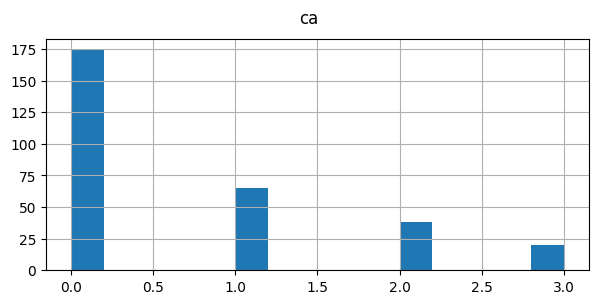

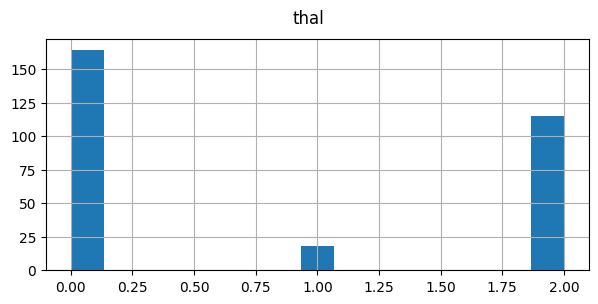

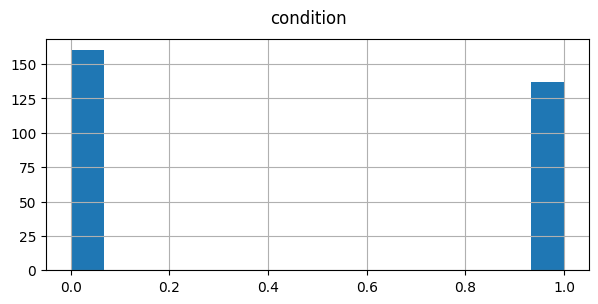

In [26]:
for col in df.columns:
    fig = plt.figure(figsize=(7,3))
    df[col].hist(bins=15)
    fig.suptitle(col)
    plt.show()

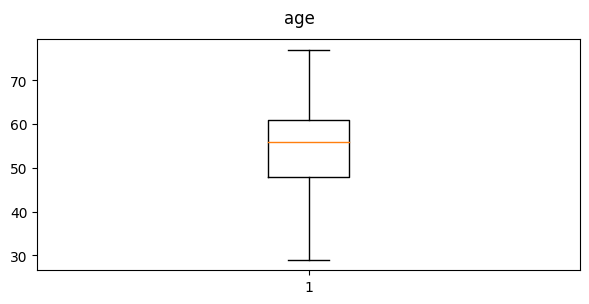

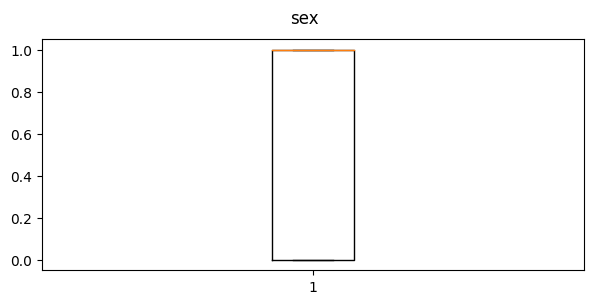

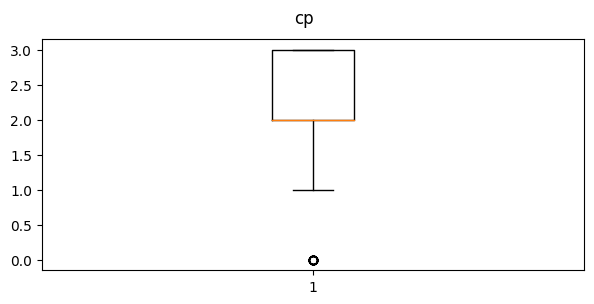

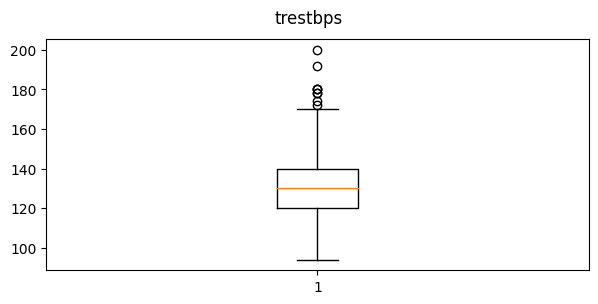

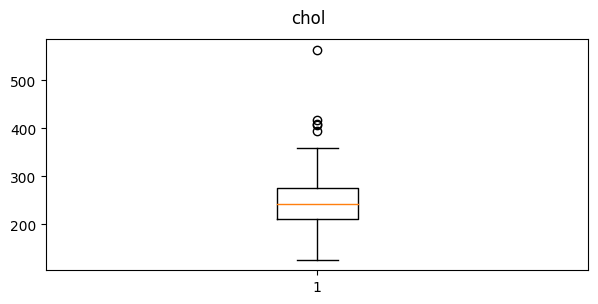

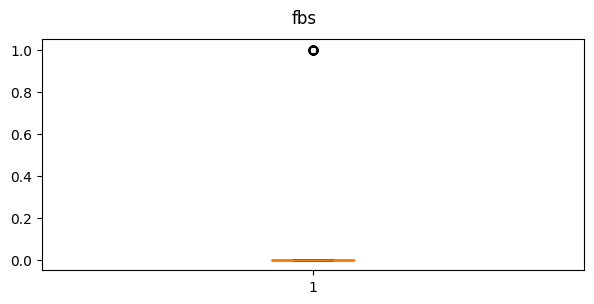

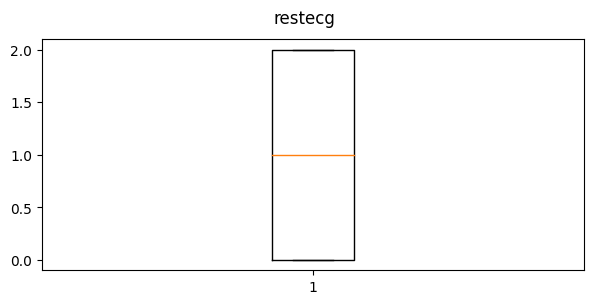

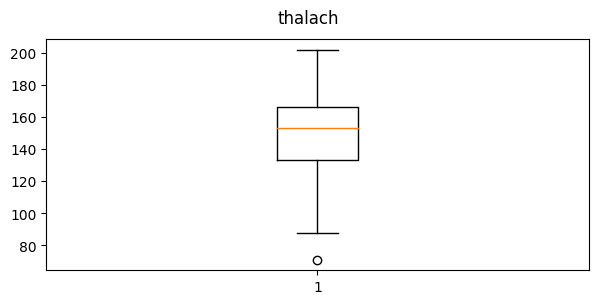

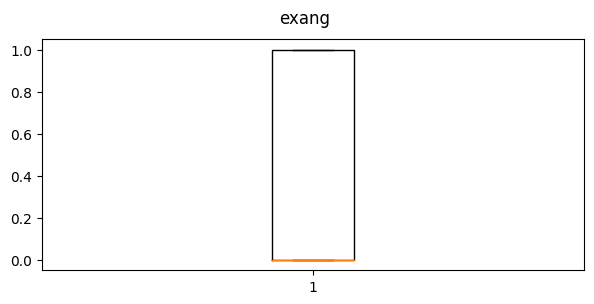

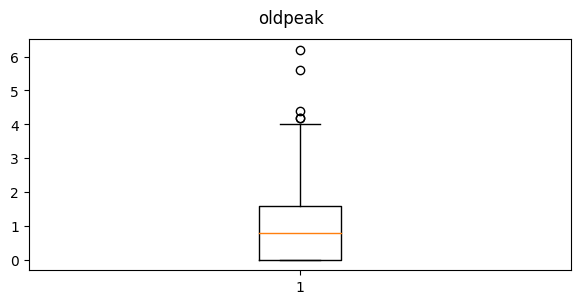

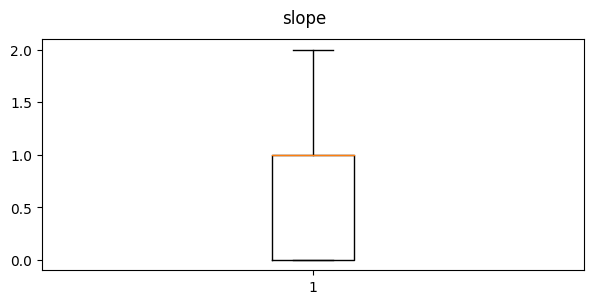

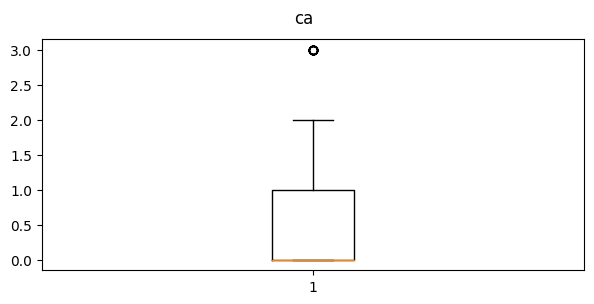

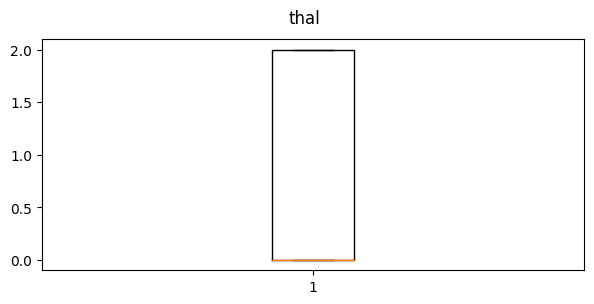

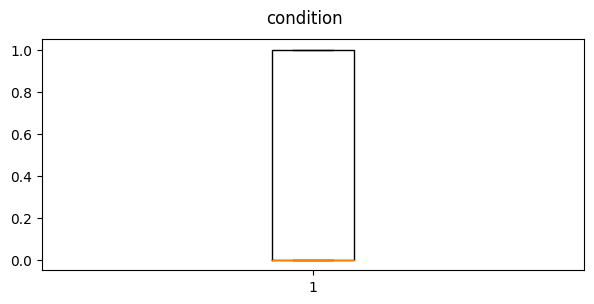

In [37]:
for col in df.columns:
    fig = plt.figure(figsize=(7,3))
    plt.boxplot(df[col])
    fig.suptitle(col)
    plt.show()

In [45]:
df.thal.value_counts()

0    164
2    115
1     18
Name: thal, dtype: int64

In [44]:
df.ca.value_counts()

0    174
1     65
2     38
3     20
Name: ca, dtype: int64

In [43]:
df.slope.value_counts()

0    139
1    137
2     21
Name: slope, dtype: int64

In [42]:
df.oldpeak.value_counts()

0.0    96
1.2    17
0.6    14
1.4    13
0.8    13
1.0    13
0.2    12
1.6    11
1.8    10
2.0     9
0.4     8
0.1     6
2.8     6
2.6     6
1.9     5
0.5     5
3.0     5
1.5     5
2.2     4
3.6     4
0.9     3
4.0     3
0.3     3
2.4     3
3.4     3
1.1     2
2.3     2
2.5     2
3.2     2
4.2     2
4.4     1
5.6     1
6.2     1
2.1     1
2.9     1
3.5     1
0.7     1
1.3     1
3.8     1
3.1     1
Name: oldpeak, dtype: int64

In [41]:
df.exang.value_counts()

0    200
1     97
Name: exang, dtype: int64

In [38]:
df.fbs.value_counts()

0    254
1     43
Name: fbs, dtype: int64

In [39]:
df.cp.value_counts()

3    142
2     83
1     49
0     23
Name: cp, dtype: int64

In [40]:
df.restecg.value_counts()

0    147
2    146
1      4
Name: restecg, dtype: int64

#### Обработка датасета

In [225]:
enc = OneHotEncoder()

categorical_columns = [
    'thal', 
    'ca',
    'slope',
    'restecg',
    'cp',
]

real_columns = [
    'oldpeak',
    'thalach',
    'chol',
    'trestbps',
    'age',
]

encoded_part = df.loc[:, categorical_columns].copy()
enc.fit(encoded_part)
encoded_part = pd.DataFrame(enc.transform(encoded_part).toarray())

copy_df = df.copy()
copy_df.drop(columns=categorical_columns, inplace=True)
copy_df = copy_df.join(encoded_part)

for col in real_columns:
    copy_df[col] = (copy_df[col] - copy_df[col].mean()) / copy_df[col].std()
    # от удаления выбросов пока придётся отказаться, 
    # так как удаляется большая часть и без того маленького датасета
    # upper_lim = train_df[col].quantile(0.95)
    # lower_lim = train_df[col].quantile(0.05)
    # train_df = train_df[(train_df[col] < upper_lim) & (train_df[col] > lower_lim)]

copy_df.columns = list(str(i) for i in range(copy_df.shape[1] - 1)) + ['condition']
copy_df = copy_df.sample(frac=1)

train_ind = int(copy_df.shape[0] * 0.90)
train_df = copy_df.iloc[:train_ind, :].copy()
val_df = copy_df.iloc[train_ind:, :].copy()

train_y = train_df['condition'].values
train_df.drop(columns=['condition'], inplace=True)
val_y = val_df['condition'].values
val_df.drop(columns=['condition'], inplace=True)

In [226]:
print(train_df.shape)
print(val_df.shape)

(267, 25)
(30, 25)


In [227]:
print(sum(train_y) / len(train_y))
print(sum(val_y) / len(val_y))

0.4606741573033708
0.6333333333333333


In [228]:
train_df.head()

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
19,-1.385907,1,0.918008,-0.064429,0,1.237957,0,-0.219150,0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
269,-0.722904,1,-0.095345,0.166351,1,0.017465,1,-0.905184,1,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
211,0.492601,1,0.467629,-1.352951,0,0.540533,1,-0.905184,1,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
171,1.155604,1,0.186142,0.127887,0,-0.985082,0,1.495935,1,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
245,-0.059901,1,-0.658320,-1.141402,0,-1.595328,0,0.295376,1,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [229]:
cls = LogisticRegression()
scores = cross_val_score(cls, train_df, train_y, scoring='accuracy', cv=5)

In [230]:
scores.mean()

1.0

In [231]:
scores

array([1., 1., 1., 1., 1.])

In [232]:
cls.fit(train_df, train_y)
pred_y = cls.predict(val_df)
print(accuracy_score(val_y, pred_y))

1.0
